# Project 2 Titanic Data

## Data Description

In this project I want to look at the titanic data set and answer a few questions based on statistic analysis. As a first step, I get an overall discription of the dataset from Kaggle.

Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them

source - https://www.kaggle.com/c/titanic/data

## Questions

Reading the description of the data, I get the idea that this is about find potential factors that affect chance of survival of a passenger. Based on the information we have, there are a few questions that I want to ask:

1.How do individual factors (gender, age) affect one's survival rate?

2.How do SES (socio-economic status) factors (ticket class, parch, sibsp) affect one's surival rate?
  Also, put the individual factors into different ses categories, how does the survival rate change? 
  For the sibling/parent factor, I assume that it will make more difference for younger passengers (childrens).How these factors change thier survival rate?
  


After getting an idea of the annotations in the dataset, I want to import the data into python notebook and take a look at it my self.

## Data Cleaning

In [29]:
# inline plot setting
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import libraries we need
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# create the dataset in python
df_titanic_data = pd.read_csv('titanic-data.csv')

In [30]:
# take a look at the first few lines of the data
df_titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# info of the dataset
df_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


I see that for some columns, the entires are less than others. So I want to see how many missing values there are. At the same time, let's also examine if there is any duplicated rows.

In [32]:
# Number of missing values
df_titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
#Number of Duplicated Rows
print '{} Duplicated Rows'.format(df_titanic_data.duplicated().sum())

0 Duplicated Rows


There arent any duplicated rows in the dataset. But it does contain some missing values for certain columns. 
For 'Cabin' column there are 687 values missing out of 889 passengers, which means that most of values are missing. Also, since the data description also doesn't give a layout of the cabins, it is hard for use to relate this part of data with the survival rate. So I will just remove this column from the dataset. I willa also remove the Embarked city column because I don't see where a person embarked will affect his survivalbility when the disaster happens. Even there is a differnce in survivalbility in this group. I think it will be result from its correlation from other SES factors.

Therefore, I will remove the following columns because they don't have that much impcat on survival rate: PassengerID, Name, Ticket, Fare, Cabin and Embark.

In [34]:
#remove unrelated columns from the dataset
df_titanic = df_titanic_data.drop(['PassengerId','Name','Ticket','Cabin', 'Fare','Embarked'], axis=1)

#view first few rows of the new dataset
df_titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [35]:
#view some description of the new dataset:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


For the Age and Embarked entires, although some of values are missing, I still want to use the data becasue we still have most of the data, and when we plot a graph these missing data is going to be treat as null. But keep in mind that we have nearly 20 percent of the age entries missing.

## Data Analysis and Visulization

### Question 1

To answer the first question - how does age and gender affect one's survival rate. I want to plot the distribution for both factors and then look for the answer.

From the chart above we find that the youngest passenger is 0.42 year old (passenger <1 year old is using fractional age) , the oldest is 80 and the average age is 29.69. Now I want to plot an age distribution graph for all passengers versus those survived to get a better sense of how age factor affects the survival rate.

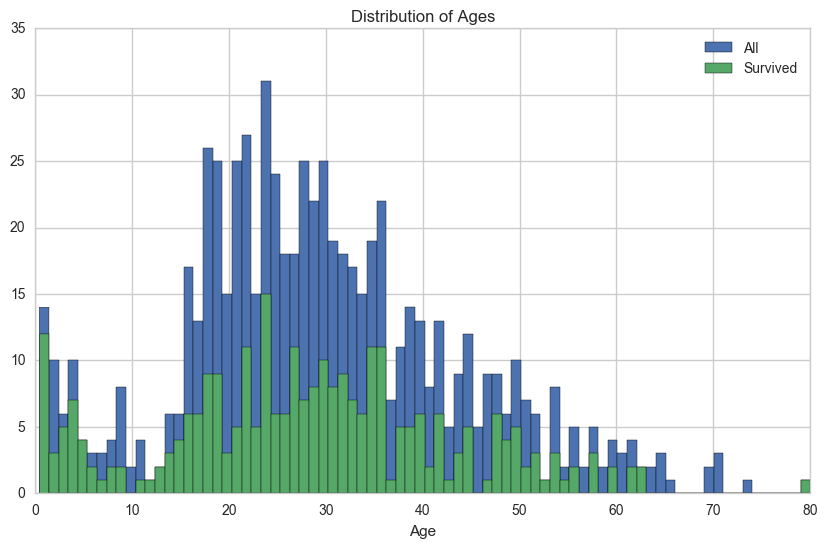

In [36]:
#histogram graph of age distribution
plt.figure(figsize=(10,6))

#for all passengers
df_titanic['Age'].hist(bins=80)

#for those survived
df_titanic[df_titanic['Survived'] == True]['Age'].hist(bins=80)

sns.plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.legend(['All','Survived'])

From the graph we can definitely tell that for kids less than 15 years old there seems to be a better survival rate compare to the population average. To approve this point, I want to add a new column 'People' to the data set with those less than 15 years labeled as 'child' and the rest labeled as 'male' and 'female'.

In [37]:
#function to check if the passenger is less than 15 years old
def check_age(passenger):
    age,sex = passenger 
    if age < 15: 
        return 'child'
    else:
        return sex

#apply to the dataset
df_titanic['People'] = df_titanic[['Age', 'Sex']].apply(check_age,axis=1)

#check the first few rows of the modified dataset
df_titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,People
0,0,3,male,22.0,1,0,male
1,1,1,female,38.0,1,0,female
2,1,3,female,26.0,0,0,female
3,1,1,female,35.0,1,0,female
4,0,3,male,35.0,0,0,male
5,0,3,male,NaN,0,0,male
6,0,1,male,54.0,0,0,male
7,0,3,male,2.0,3,1,child
8,1,3,female,27.0,0,2,female
9,1,2,female,14.0,1,0,child


Please notice that for those entries with missing age, the new column will directly take the gender entrie instead.

Now lets plot the survival rate base on the new People column to see if our assumption that children have a better survival rate is true.

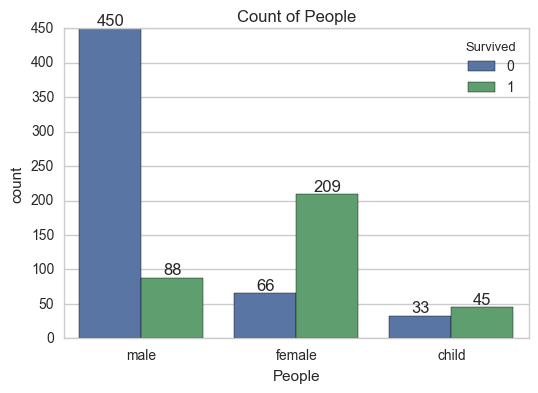

In [38]:
# Function to add values on top of bars in countplots
def annotate_bar(ax):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., 1*p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')
        
#histogram graph of people count
plt.figure(figsize=(6,4))

pc = sns.countplot(x = 'People', data=df_titanic, hue = 'Survived')
annotate_bar(pc)
sns.plt.title('Count of People')

From the count histogram above we can see that not only the child survivalbility, but also the femal survivalbility is much higher than male's. I want to calculate the specific survival rate for each of the group and compare to the average survival rate. At the same time, I also want to plot the survival rate of each group to compare.

Overall Survivalbility: 
0.383838383838
Child Survivalbility: 
0.576923076923
Men Survivalbility: 
0.163568773234
Women Survivalbility: 
0.76


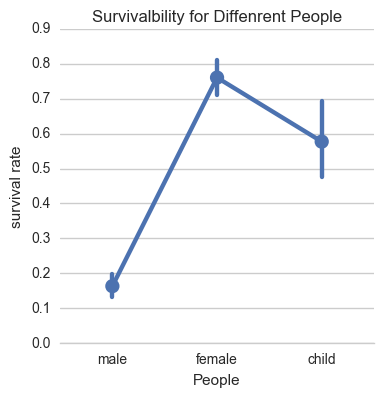

In [39]:
#Create seperate data set for each category in people column. This is because I also want to use this factor 
#in the second question.
Child_df = df_titanic[df_titanic.People =='child']
Men_df = df_titanic[df_titanic.People =='male']
Women_df = df_titanic[df_titanic.People =='female']

#calcutate survival rate for each group of people
overallProb = df_titanic.Survived.mean()
childProb = Child_df.Survived.mean()
womenProb = Women_df.Survived.mean()
menProb = Men_df.Survived.mean()

print("Overall Survivalbility: ")
print(overallProb)
print("Child Survivalbility: ")
print(childProb)
print("Men Survivalbility: ")
print(menProb)
print("Women Survivalbility: ")
print(womenProb)

#plot based on people category
pgs = sns.factorplot("People", "Survived", data=df_titanic, size=4)
pgs.despine(left=True)
pgs.set_ylabels("survival rate")
sns.plt.title('Survivalbility for Diffenrent People')

From the analysis above we can see that women and child's survival rate is above average and thus much higher than men's. I assume this is because people tends to give life boat to women and children. And I want to continue to Question 2 to see how SES affect these results.

### Qustion 2

In question 2 I want to look at how ticket class, parent and sibling factor affect one's survival rate on titanic. As a first step I want to focus on how ticket class affect the result and how it make difference to the people group analysis we conducted in the previous section. And later on I want to look at how siblint/parent factor affect a child's survival rate.

In [40]:
#Find the survivalbility for people in each class, regardless of other factors.
def classsurvival(x):
    df_class = df_titanic[df_titanic.Pclass == x]
    survival_rate = df_class.Survived.mean()
    return survival_rate

print("Class 1 Survivalbility:")
print(classsurvival(1))
print("Class 2 Survivalbility:")
print(classsurvival(2))
print("Class 1 Survivalbility:")
print(classsurvival(3))

Class 1 Survivalbility:
0.62962962963
Class 2 Survivalbility:
0.472826086957
Class 1 Survivalbility:
0.242362525458


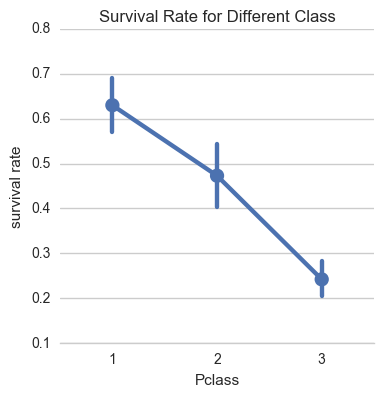

In [41]:
#plot survivalbility based on class category
cs = sns.factorplot("Pclass", "Survived", data=df_titanic, size=4)
cs.despine(left=True)
cs.set_ylabels("survival rate")
sns.plt.title('Survival Rate for Different Class')

It is quite obvious that the first class have the highest survival rate and the 3rd class has the lowest survival rate. I assume that this is also because the location of each class - the 1st class is on the upper lever thus may be hit by the water later than the lower level, so people have more time to escape to a life boat.

Now lets combine the people group factor and the class factor to see how survival rate distributes based on people groups in different ticket classes.

First of all, lets see how people group distrubutes in different classes.

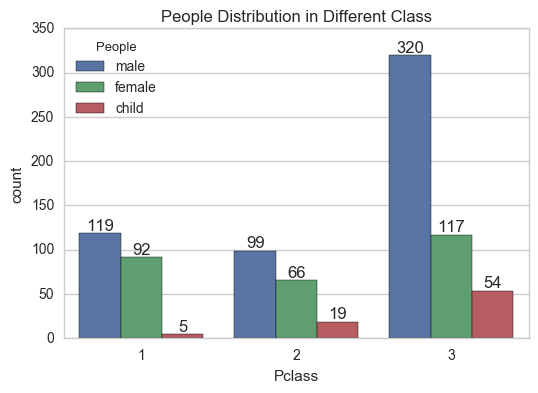

In [42]:
#Count of Passengers in different classes
plt.figure(figsize=(6,4))
CPC= sns.countplot(x='Pclass',order=[1,2,3], data=df_titanic, hue='People')
annotate_bar(CPC)
sns.plt.title('People Distribution in Different Class')


In class 1 the children only contributes to very little of the population compare to other two classes. Class 3 has the most men passengers. Lets look at the survival rate here.

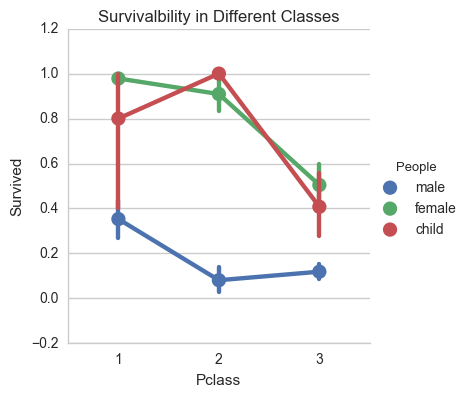

In [43]:
#Plot of survival rate for all classes, based on different people group
sns.factorplot("Pclass", "Survived", hue='People',order=[1,2,3], data=df_titanic, kind='point')
sns.plt.title('Survivalbility in Different Classes')

The graph above tells that regard less of class, women and children do have a better chance to survive. But overall, the first class passengers do have the highest survival rate and the 3rd class the lowest. We can see that here children in second class has the highest survival rate, which is a little different from what we assumed before. I think one of the reason is that the number of kids in the 1st class is so few that even 1 death of the of them will impcat the survival rate drasticly. 

But what can be the other factors that affect a child's chance to survive? I want to look at the fact that if the child is with a parent or a sibling.
In terms of this, I want to add a new column "Guardian" to the child dataset I created in Question 1. If a child has a family mumber around, we put entry "Yes" to the column and "No" otherwise. Please notice that in the description from Kaggle, we see that children can be with a Nannie if no family member is around. So the "No" entry doesn't necessary mean that the kid is alone. He or she can be with a Nannie instead.

In [44]:
#function to check if a child has a family member around
def guardian_check(kid):
    sib,parch = kid 
    if sib ==0 and parch==0: 
        return 'No'
    else:
        return 'Yes'

#apply to the dataset
df_titanic['Guardian'] = df_titanic[['SibSp', 'Parch']].apply(guardian_check,axis=1)
Child_df = df_titanic[df_titanic.People =='child']

#check the first few rows of the modified dataset
Child_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,People,Guardian
7,0,3,male,2.0,3,1,child,Yes
9,1,2,female,14.0,1,0,child,Yes
10,1,3,female,4.0,1,1,child,Yes
14,0,3,female,14.0,0,0,child,No
16,0,3,male,2.0,4,1,child,Yes


Now Let's compare children's survival rate based on Guardian

In [45]:
Child_df.Guardian.isnull().sum()

0

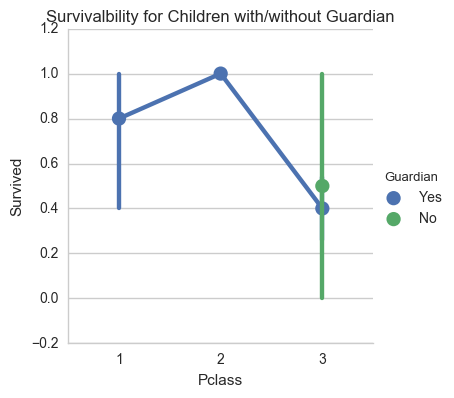

In [46]:
#Plot of survival rate for all classes, based on different people group
sns.factorplot("Pclass", "Survived", hue='Guardian',order=[1,2,3], data=Child_df, kind='point')
sns.plt.title("Survivalbility for Children with/without Guardian")

Here we see that the Guradian factor doesn't affect the result siginificantly. 

## Conclustion

Throught the data analysis and visualization above, we can now answer the questions we asked in the begining of the project. 

The individual factors (age, gender) does affect the survivalbility of a passenger. Although age itself doesn't have an obvious relation to survival rate, we do see that children (those less than 15 year old) have a higher survival rate than average. At the same time, women's survivalblity is much higher than men. we can assume that more life boat spaces are given to women and children.

As a second step, we consider individual factor together with the socio-economic factors. It shows that passengers in 1st class have the highest survivalbility and those in 3rd class have the lowest survivalbility. But at the same time, in each class, women and children still have much higher survival rate than men. based on that we further look into the children group to see if the fact that a child is with a family member or a nanny affect one's survivalbility. The result shows that only some children in 3rd class don't have either parents or siblings around. But that doesn't really decrease one's chance of survivalbility.

In this analysis, we didn't evaluate the impact of ticket fare and cabin facotrs. But if we can get more information on how ticket fare difference breaks down (aside from ticket classes), or if we can get a general idea of how cabins layout on titanic and which part got hit first, then we may be able to utilize this part of data.